In [20]:
import pandas as pd

df = pd.read_csv('typefromcsvres/results.csv')
print(df.keys())
df.groupby(['keyboard.type','keyheight.type'])['iki','wpm','bs','immediate.bs','delayed.bs'].mean()

Index(['sentence.id', 'agent.id', 'target.sentence', 'wpm', 'lev.distance',
       'gaze.shift', 'bs', 'immediate.bs', 'delayed.bs', 'gaze.keyboard.ratio',
       'fix.count', 'finger.travel', 'iki', 'correct.error',
       'uncorrected.error', 'fix.duration', 'chunk.length', 'keyboard.type',
       'keyheight.type'],
      dtype='object')


/home/helena/anaconda3/envs/typing/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


iki        wpm        bs  immediate.bs  \
keyboard.type keyheight.type                                                  
Gboard        large           430.677208  20.682914  6.200000      1.800000   
              medium          462.501337  20.147552  3.733333      1.600000   
              small           426.991106  17.643932  9.800000      2.600000   
Go            large           421.905807  18.008585  9.466667      1.733333   
              medium          440.923466  21.825786  5.200000      1.400000   
              small           450.248045  21.230679  4.200000      1.533333   
SwiftKey      large           429.202701  19.127670  6.666667      2.000000   
              medium          450.357532  20.309440  5.666667      1.800000   
              small           439.866786  21.081593  4.533333      1.600000   

                              delayed.bs  
keyboard.type keyheight.type              
Gboard        large             0.666667  
              medium            0.800000  
              small             1.400000  
Go            large             1.266667  
              medium            1.066667  
              small             0.866667  
SwiftKey      large             0.933333  
              medium            1.066667  
              small             0.866667

In [3]:
df.groupby(['keyboard.type','keyheight.type'])['iki','wpm','bs','immediate.bs','delayed.bs'].std()

/home/helena/anaconda3/envs/typing/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


iki       wpm         bs  immediate.bs  \
keyboard.type keyheight.type                                                 
Gboard        large           48.591814  6.401548  10.489450      1.740279   
              medium          63.191688  4.625850   3.127451      0.910259   
              small           45.331784  6.480408  10.234396      1.681836   
Go            large           47.760235  6.500200  15.333747      1.533747   
              medium          26.683717  3.394715   8.520563      1.298351   
              small           28.726471  2.831100   4.768947      1.125463   
SwiftKey      large           54.660119  6.626742  11.787806      1.558387   
              medium          33.610477  4.879136   7.364652      1.567528   
              small           25.915876  4.890407   5.488516      1.638815   

                              delayed.bs  
keyboard.type keyheight.type              
Gboard        large             0.975900  
              medium            0.861892  
              small             1.404076  
Go            large             1.162919  
              medium            1.334523  
              small             1.355764  
SwiftKey      large             1.279881  
              medium            1.437591  
              small             1.125463

Plot IKI


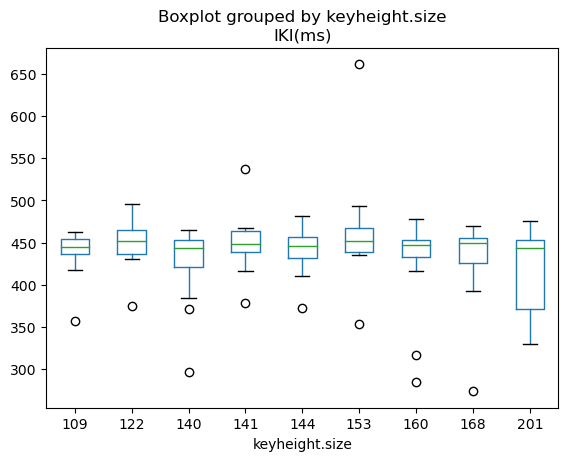

Plot WPM


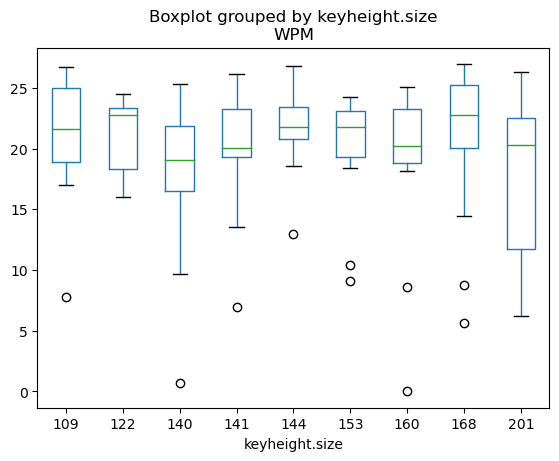

Plot bs


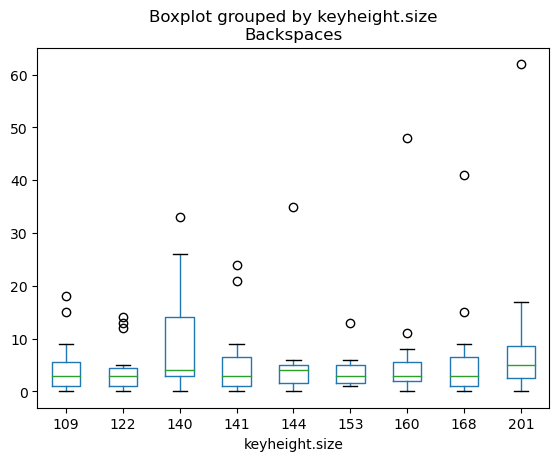

Plot immediate.bs


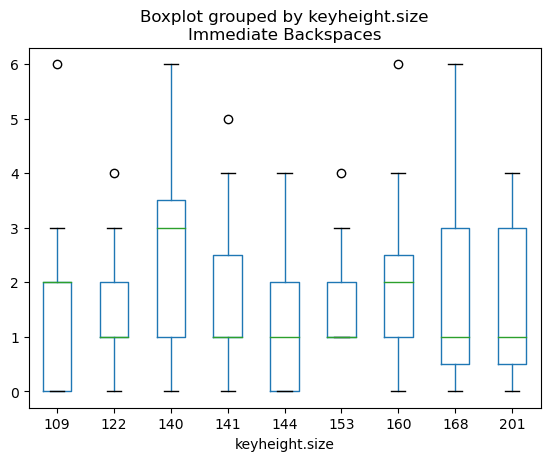

Plot delayed.bs


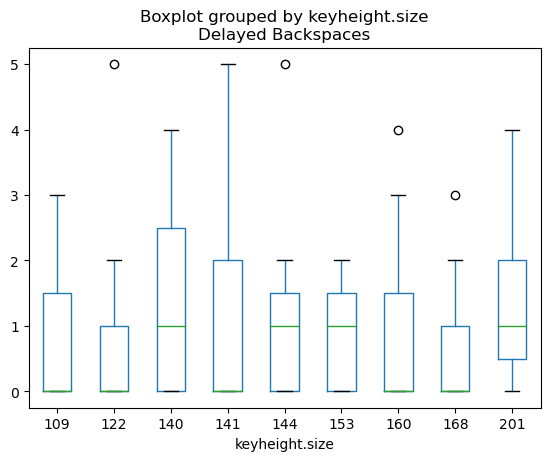

In [21]:
# Gboard: 140,153,168
# SwiftKey: 109,141,160
# Go: 122, 144,201
def keysizematch(kb, kh):
    khsize = 0
    if (kb == 'Gboard'):
        if (kh == 'small'):
            khsize = 140
        if (kh == 'medium'):
            khsize = 153
        if (kh == 'large'):
            khsize = 168
    if (kb == 'SwiftKey'):
        if (kh == 'small'):
            khsize = 109
        if (kh == 'medium'):
            khsize = 141
        if (kh == 'large'):
            khsize = 160
    if (kb == 'Go'):
        if (kh == 'small'):
            khsize = 122
        if (kh == 'medium'):
            khsize = 144
        if (kh == 'large'):
            khsize = 201

    return khsize

df['keyheight.size'] = df.apply(lambda x: keysizematch(x['keyboard.type'], x['keyheight.type']), axis=1)
#print(df.head())
import matplotlib.pyplot as plt

print("Plot IKI")
df.boxplot(column=["iki"], by="keyheight.size", grid=False)
plt.title("IKI(ms)")
plt.show()
print("Plot WPM")
df.boxplot(column=["wpm"], by="keyheight.size", grid=False)
plt.title("WPM")
plt.show()
print("Plot bs")
df.boxplot(column=["bs"], by="keyheight.size", grid=False)
plt.title("Backspaces")
plt.show()
print("Plot immediate.bs")
df.boxplot(column=["immediate.bs"], by="keyheight.size", grid=False)
plt.title("Immediate Backspaces")
plt.show()
print("Plot delayed.bs")
df.boxplot(column=["delayed.bs"], by="keyheight.size", grid=False)
plt.title("Delayed Backspaces")
plt.show()